In [1]:
import pandas as pd
import torch
from torchvision import transforms
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
DRIVE_DIR = "Porsche/tantrix-data/"
UOB_DIR = "/run/media/mah904/"
HOME_DIR = "/media/markus/"
BASE_DIR = UOB_DIR
REPO_DIR = os.path.join(HOME_DIR,DRIVE_DIR)

GRABCUT_DIR = os.path.join(BASE_DIR, "grabcut/")
BOUNDINGBOX_DIR = os.path.join(BASE_DIR, "databb1/")

In [3]:
labels_fn =  "data1/path_and_kpts1.csv"
kpts_frame = pd.read_csv(labels_fn)

In [4]:
img_name = kpts_frame.iloc[:, 1]
kpts = kpts_frame.iloc[:, 2:]


In [54]:
def show_landmarks(image, landmarks, trans_func=None, img_size=300):
    """Show image with landmarks"""
    landmarks = landmarks*img_size
    if trans_func is not None:
        image = trans_func(image)
    new_img = image.permute([1,2,0])
    plt.imshow(new_img.int())
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

In [51]:
class TantrixLandmarksDataset(torch.utils.data.Dataset):
    
    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.transform = transform
        
    def __len__(self):
        return len(self.landmarks_frame)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = self.landmarks_frame.iloc[idx, 1]
        image = io.imread(os.path.join(BASE_DIR, img_name))
        size_x, size_y, _ = image.shape
        landmark_normalizer = np.array([size_x, size_y ])
        image = image.transpose((2, 0, 1))
        image = torch.from_numpy(image).float()
#         #print(image.shape)
        if self.transform:
            image = self.transform(image)
        landmarks = self.landmarks_frame.iloc[idx, 2:]
        landmarks = np.array([landmarks])
        landmarks = landmarks / landmark_normalizer[:,None]
        landmarks = landmarks.astype('float').reshape(-1, 2)
        
        calc_max = np.amax(landmarks, axis = -2)
        calc_min = np.amin(landmarks, axis = -2)
        stack_calc = np.stack([calc_min, calc_max], axis=1)
        bb = stack_calc.reshape((-1,2,2))
        
        sample = {'image': image, 'landmarks': torch.from_numpy(landmarks), 'bb':torch.from_numpy(bb)} # torch.from_numpy(image), torch.from_numpy(landmarks)

        

        return sample

In [52]:
#from other file:
std = 59.27295119572318
mean = 111.47896697185168 

trans = transforms.Normalize((mean, mean, mean), (std, std, std), inplace=False)

tantrix_DS = TantrixLandmarksDataset(labels_fn, transform = trans)
split_ind = int(len(tantrix_DS)*0.8)
dataset_split = torch.utils.data.random_split(tantrix_DS, [split_ind, len(tantrix_DS)-split_ind])
dataset_split

In [90]:
len(dataset_split[1])

1000

In [15]:
invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/std, 1/std, 1/std ]),
                                transforms.Normalize(mean = [ -mean, -mean, -mean ],
                                                     std = [ 1., 1., 1. ]),
                               ])

[[[0.22625242 0.53253326]
  [0.28218877 0.60781718]]]


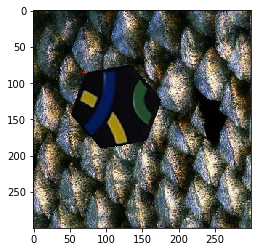

[[[0.24601156 0.54363729]
  [0.58541677 0.87420532]]]


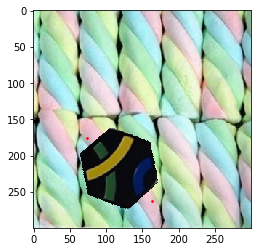

[[[0.15234461 0.45632426]
  [0.15783325 0.43196269]]]


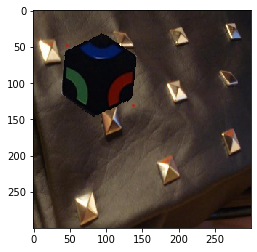

[[[0.27223806 0.59660955]
  [0.5262351  0.88052907]]]


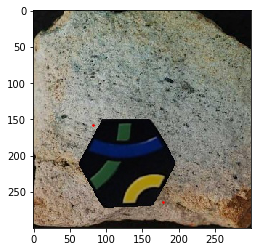

[[[0.47205256 0.80065653]
  [0.43458654 0.78544062]]]


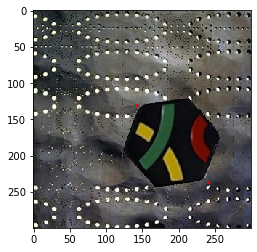

In [127]:
for i in range(5):
    sample = tantrix_DS[i]
    image = sample["image"]
    landmarks = np.array(sample["bb"])
    print(landmarks)
    show_landmarks(image, landmarks, invTrans, 300)

In [139]:
for i, data in enumerate(dataloader):
    offset = 0#len(tantrix_DS)-5
    sample = data
    
    land = sample['landmarks']
    calc_max = np.amax(np.array(land), axis = -2)
    calc_min = np.amin(np.array(land), axis = -2)
    print("landmark")
    print(land)
    print("calculated")
    print(calc_max)
    print(calc_min)
    
    print(reshape_calc)
    
    if i == 10:
        break
    
#     print(sample)
#     print(np.array(sample['image']).min())
#     print(i+offset, sample['image'].shape, sample['landmarks'].shape, sample['bb'])

#     ax = plt.subplot(1, 4, i + 1)
#     plt.tight_layout()
#     ax.set_title('Sample #{}'.format(i))
#     ax.axis('off')
#     show_landmarks(**sample)
#     if i == 3:
#         plt.show()
#         break

landmark
tensor([[[0.4206, 0.6078],
         [0.2263, 0.3943],
         [0.2560, 0.5515],
         [0.3481, 0.2822],
         [0.3769, 0.4424],
         [0.3769, 0.4424],
         [0.5325, 0.4957],
         [0.5009, 0.3244],
         [0.4206, 0.6078],
         [0.2263, 0.3943],
         [0.2560, 0.5515],
         [0.3481, 0.2822],
         [0.3769, 0.4424],
         [0.3769, 0.4424],
         [0.5325, 0.4957],
         [0.5009, 0.3244]],

        [[0.2460, 0.7534],
         [0.4437, 0.5854],
         [0.4886, 0.8386],
         [0.5436, 0.6897],
         [0.3915, 0.7243],
         [0.3915, 0.7243],
         [0.3487, 0.8742],
         [0.2960, 0.6163],
         [0.2460, 0.7534],
         [0.4437, 0.5854],
         [0.4886, 0.8386],
         [0.5436, 0.6897],
         [0.3915, 0.7243],
         [0.3915, 0.7243],
         [0.3487, 0.8742],
         [0.2960, 0.6163]],

        [[0.3001, 0.2974],
         [0.3001, 0.2974],
         [0.3878, 0.1754],
         [0.2296, 0.1578],
         [0.456

In [19]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

In [69]:
dataloader = torch.utils.data.DataLoader(dataset_split[0], batch_size=4,
                        shuffle=True, num_workers=4)
valid_dataloader = torch.utils.data.DataLoader(dataset_split[1], batch_size=4,
                        shuffle=True, num_workers=4)

dataloader_dict = {"train": dataloader, "val": valid_dataloader}

In [96]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #300x300
        self.conv1 = nn.Conv2d(3, 32, 5)
        #300-5+1 = 296
        self.pool1 = nn.MaxPool2d(2, 2, ceil_mode = True)
        #296/2 = 135
        
        self.conv2 = nn.Conv2d(32, 64, 3)
        #135-3+1 = 132
        self.pool2 = nn.MaxPool2d(2, 2, ceil_mode = True)
        #132/2 = 66
        
        self.conv3 = nn.Conv2d(64, 128, 3)
        #66-3+1 = 64
        self.pool3 = nn.MaxPool2d(2, 2, ceil_mode = True)
        #64/2 = 32
        
        self.conv4 = nn.Conv2d(128, 512, 3)
        #32-3+1 = 30
        self.pool4 = nn.MaxPool2d(2, 2, ceil_mode = True)
        #30/2 = 15
        
        self.fc1 = nn.Linear(512 * 17 ** 2, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 4)

    def forward(self, x):
        x = self.pool1(F.leaky_relu(self.conv1(x)))
        x = self.pool2(F.leaky_relu(self.conv2(x)))
        x = self.pool3(F.leaky_relu(self.conv3(x)))
        x = self.pool4(F.leaky_relu(self.conv4(x)))
        x = x.view(-1, 512 * 17 ** 2)
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [84]:
use_cuda = torch.cuda.is_available()
use_cuda

True

In [97]:
net.parameters
if use_cuda: net.cuda()

In [98]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [70]:
net.train?

In [99]:

nb_of_epochs = 10
PRINT_EVERY = 50
nb_of_train_samples = split_ind
nb_of_val_samples = len(tantrix_DS) - split_ind 
mean_train_array = np.ones(nb_of_epochs*int(nb_of_train_samples/PRINT_EVERY))
mean_val_array = np.ones(nb_of_epochs*int(nb_of_val_samples/PRINT_EVERY))
nb_of_samples_array = [nb_of_train_samples, nb_of_val_samples]
mean_array = [mean_train_array, mean_val_array]

for epoch in range(nb_of_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for phase in ['train', 'val']:
        if phase == 'train':
            net.train(True)
        else:
            net.train(False)
        for i, data in enumerate(dataloader_dict[phase]):
            # get the inputs; data is a list of [inputs, labels]
            [inputs, landmark, boundingbox] = data.values()


            ground_truth = boundingbox.squeeze().float()
    #         print(ground_truth)

            # zero the parameter gradients
            optimizer.zero_grad()

            if use_cuda:
                inputs = inputs.cuda()
                ground_truth = ground_truth.cuda()
    #         print()

            # forward + backward + optimize
            outputs = net(inputs)
            outputs = outputs.view((4, 2, 2))
    #         print(type(outputs))
    #         print(type(ground_truth))
            loss = criterion(outputs, ground_truth)

            if phase == 'train':
                loss.backward()
                optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % PRINT_EVERY == 0 and i:    # print every PRINT_EVERY mini-batches
                nb = nb_of_samples_array[phase=='val']
#                 print(nb)
                pha_i = int(phase=='val')
#                 print(pha_i)
                array_i = int(nb*epoch/PRINT_EVERY+i/PRINT_EVERY)
#                 print(array_i)
                mean_array[pha_i][array_i] = np.mean(running_loss)
                print('[%d, %5d, %d] loss: %.6f' %
                      (epoch, i, pha_i, running_loss / PRINT_EVERY))
                running_loss = 0.0

print('Finished Training')

[0,    50, 0] loss: 0.055639
[0,   100, 0] loss: 0.027453
[0,   150, 0] loss: 0.020518
[0,   200, 0] loss: 0.013325
[0,   250, 0] loss: 0.012294
[0,   300, 0] loss: 0.013729
[0,   350, 0] loss: 0.010260
[0,   400, 0] loss: 0.008530
[0,   450, 0] loss: 0.006091
[0,   500, 0] loss: 0.007104
[0,   550, 0] loss: 0.006886
[0,   600, 0] loss: 0.005679
[0,   650, 0] loss: 0.005912
[0,   700, 0] loss: 0.005164
[0,   750, 0] loss: 0.004161
[0,   800, 0] loss: 0.004787
[0,   850, 0] loss: 0.005774
[0,   900, 0] loss: 0.002643
[0,   950, 0] loss: 0.003753
[0,    50, 1] loss: 0.005935
[0,   100, 1] loss: 0.002939
[0,   150, 1] loss: 0.003168
[0,   200, 1] loss: 0.002790
[1,    50, 0] loss: 0.002490
[1,   100, 0] loss: 0.001857
[1,   150, 0] loss: 0.001949
[1,   200, 0] loss: 0.001690
[1,   250, 0] loss: 0.002024
[1,   300, 0] loss: 0.001984
[1,   350, 0] loss: 0.002961
[1,   400, 0] loss: 0.002776
[1,   450, 0] loss: 0.002029
[1,   500, 0] loss: 0.002316
[1,   550, 0] loss: 0.001806
[1,   600, 0] 

In [108]:
torch.save(net.state_dict(), "bbvadamNetwithLeakyReLU.pth")

In [107]:
%matplotlib qt

mean_train_array = mean_train_array[mean_train_array!= 1]
mean_val_array = mean_val_array[mean_val_array!= 1]

plt.plot(mean_train_array,
        label="Mean Training loss")
plt.plot(range(0, len(mean_train_array)+6, 5), mean_val_array,
        label="Mean Validation loss")
plt.legend()


In [109]:
anothernet = Net()

In [111]:
anothernet.load_state_dict(torch.load("bbvadamNetwithLeakyReLU.pth"))

<All keys matched successfully>

In [112]:
anothernet.cuda()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv4): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (fc1): Linear(in_features=147968, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=4, bias=True)
)

In [44]:
sample = tantrix_DS[np.random.randint(len(tantrix_DS))]

In [45]:
sample = tantrix_DS[np.random.randint(len(tantrix_DS))]
input_img = sample["image"].unsqueeze(0) 
output = anothernet(input_img.cuda())
output

tensor([[0.4046, 0.6533, 0.1847, 0.4154]], device='cuda:0',
       grad_fn=<AddmmBackward>)

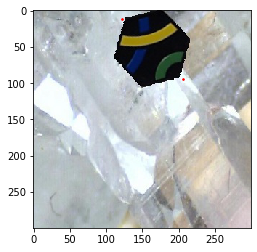

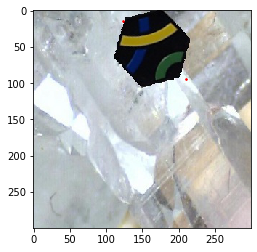

In [165]:
%matplotlib inline

this_loader = dataloader_dict['val']
# iterable = IterableDataset()

val_dataset = this_loader.dataset
sample = val_dataset[np.random.randint(len(this_loader))]

input_img = sample["image"].unsqueeze(0)
output = anothernet(input_img.cuda())
ouy=output.detach().cpu()
landmarks_output = ouy.view((-1,2, 2))
show_landmarks(sample["image"], sample["bb"], invTrans)
show_landmarks(sample["image"], landmarks_output, invTrans)